In [1]:
data(iris)
str(iris)


'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


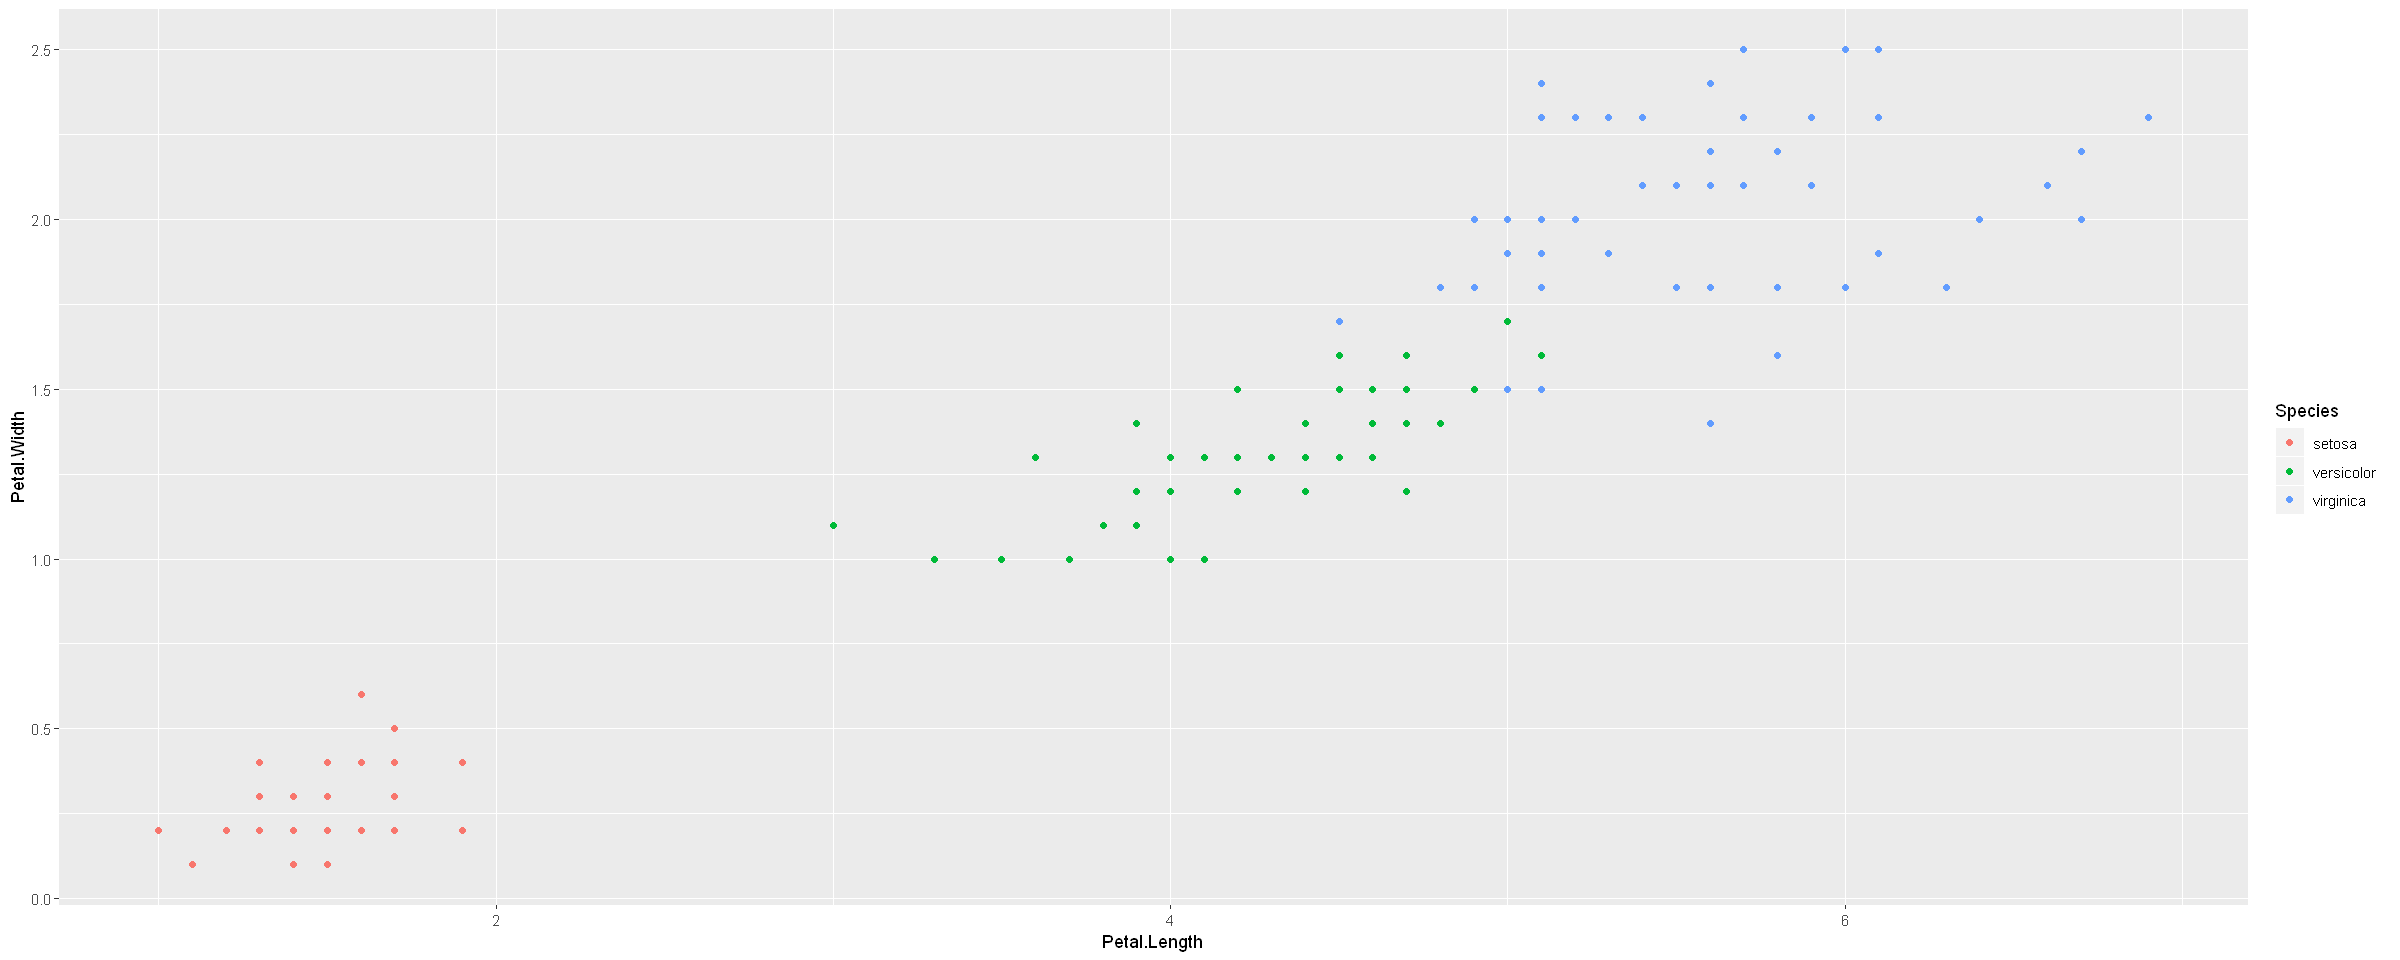

In [7]:
library(ggplot2)
options(repr.plot.width = 20, repr.plot.height = 8)
qplot(Petal.Length, Petal.Width , data = iris , 
      color = Species)



Call:
svm(formula = Species ~ ., data = iris)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  51

 ( 8 22 21 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




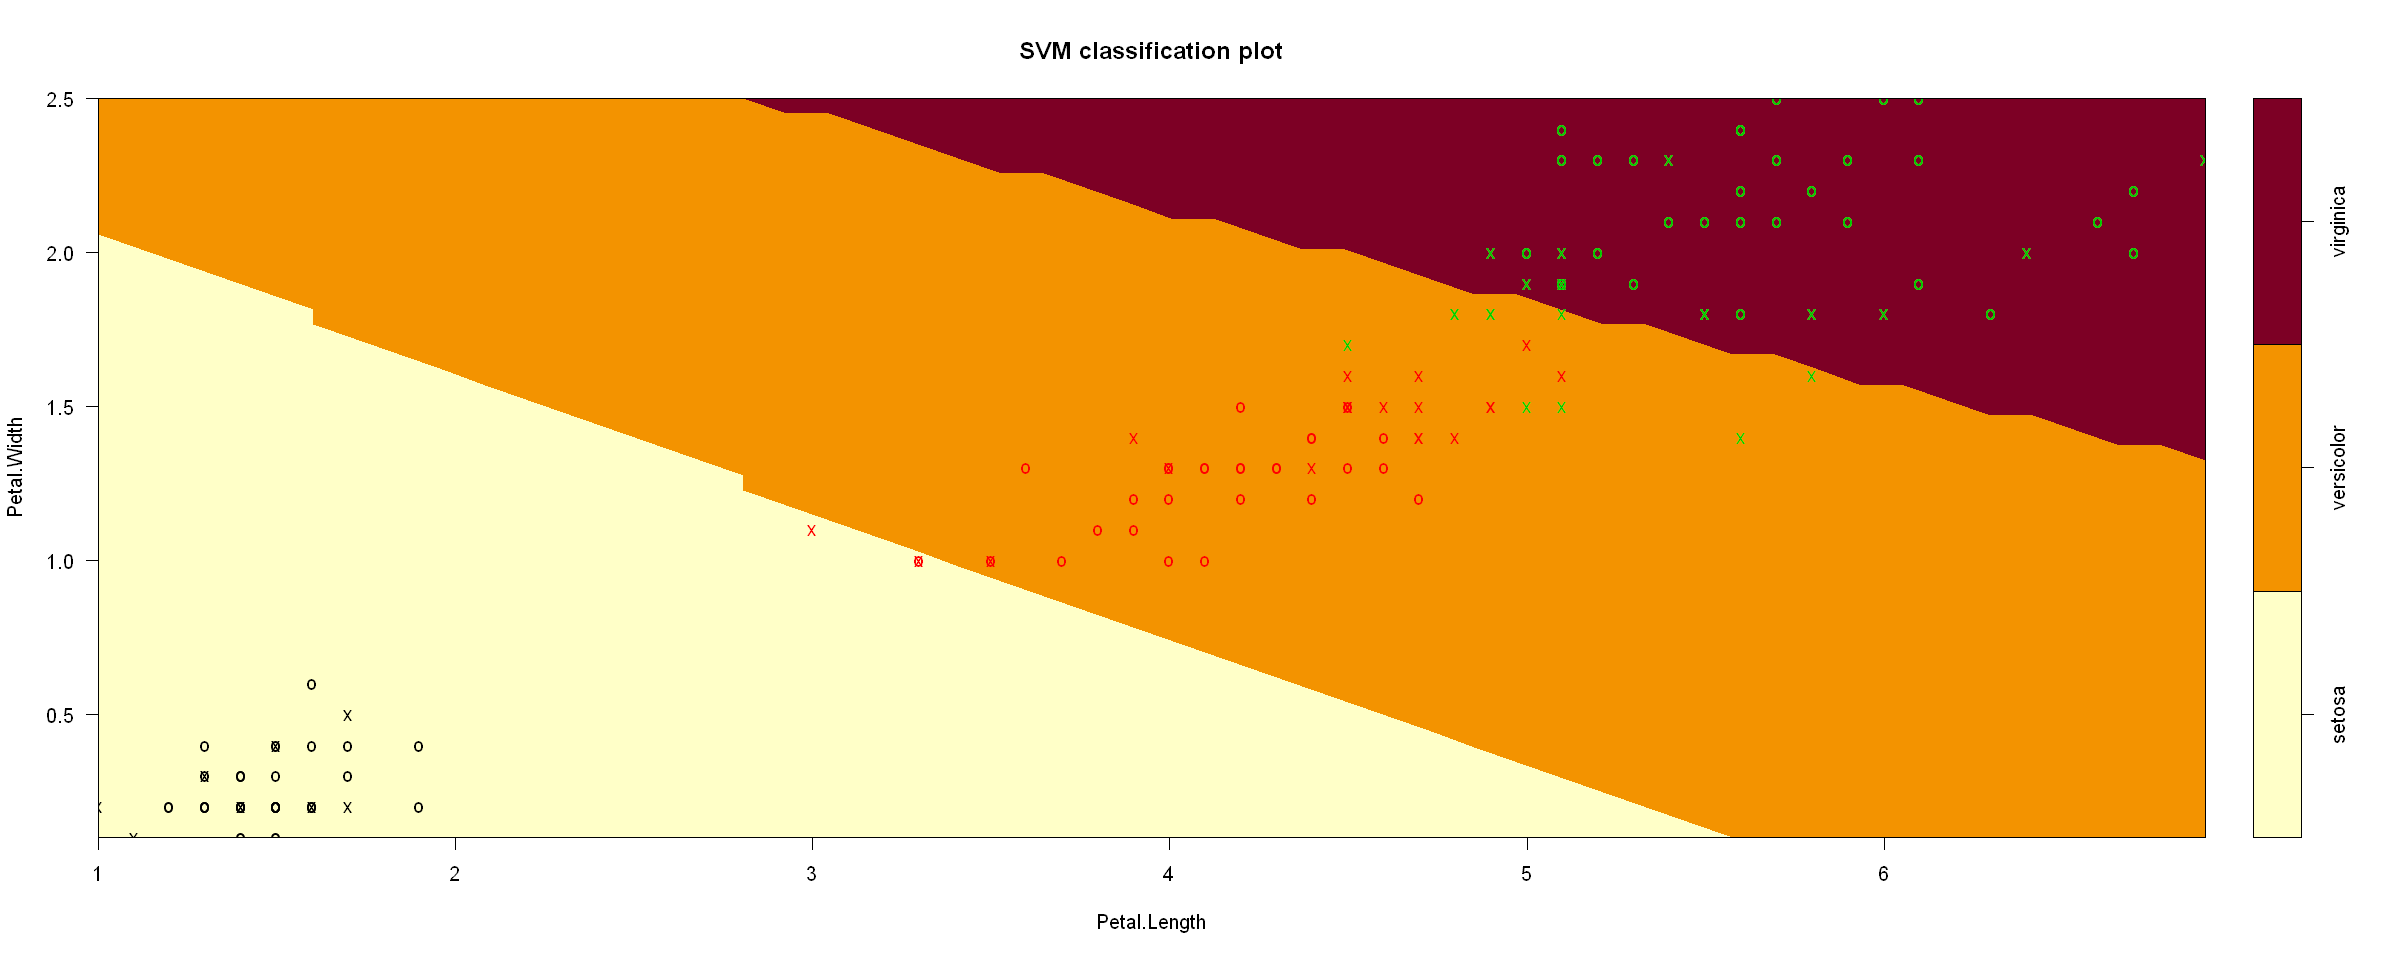

In [10]:
#Support Vector Machine 
library(e1071)
mymodel <- svm(Species~ . , data = iris )

summary(mymodel)

plot(mymodel , data = iris , Petal.Width~ Petal.Length, 
     slice = list(Sepal.Length = 4 , Sepal.Width = 3))



In [14]:
pred <- predict(mymodel , iris)
tab <- table(Predicted = pred , Actual = iris$Species)
tab
accuracy = sum(diag(tab)) / sum(tab)
accuracy

            Actual
Predicted    setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         2
  virginica       0          2        48

[1] 0.9733333

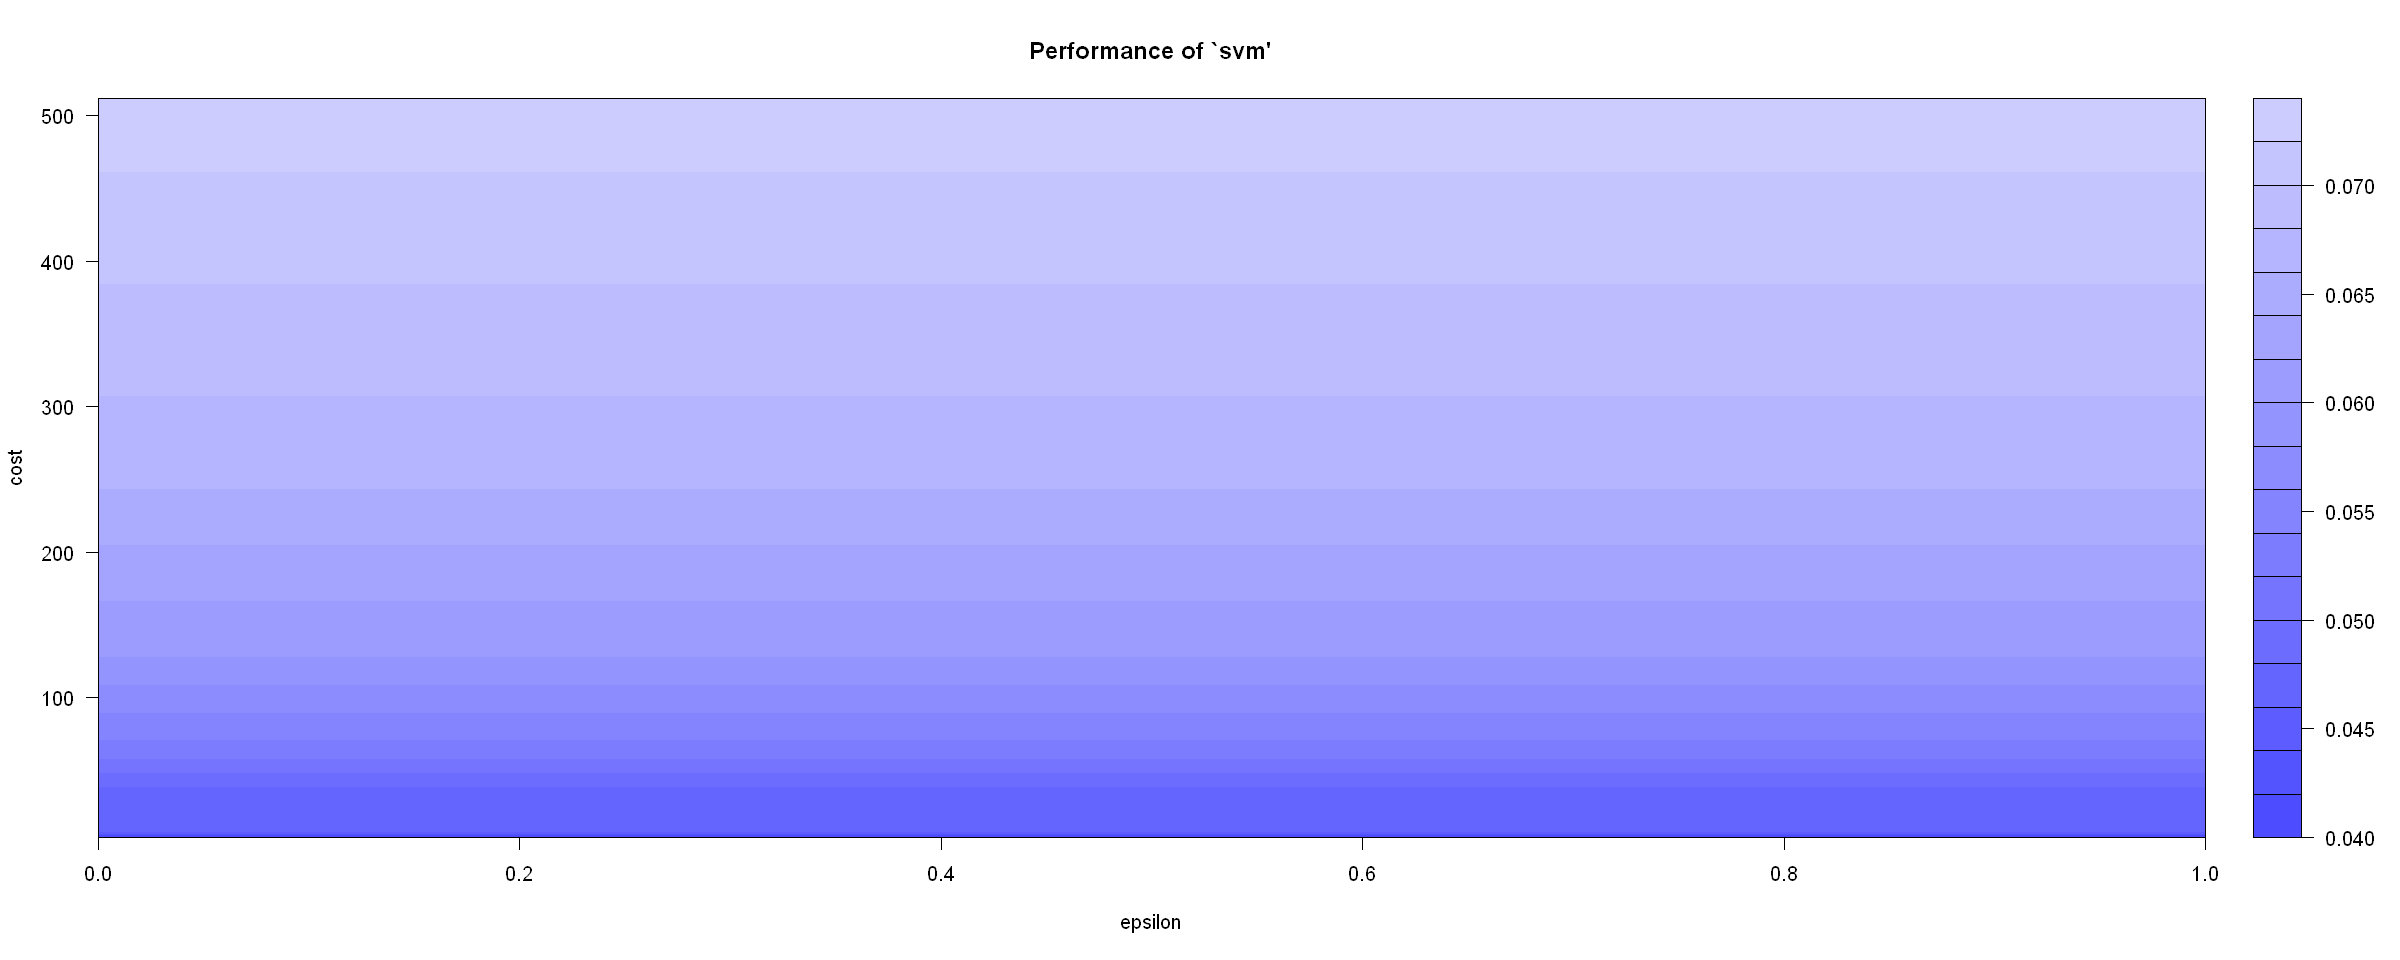

In [15]:
#Tuning
set.seed(123)
tmodel <- tune(svm , Species ~ . , data = iris ,
     ranges = list(epsilon = seq(0,1,0.1) , cost = 2^(2:9)))
plot(tmodel)

In [16]:
summary(tmodel)

mymodel <- tmodel$best.model
summary(mymodel)




Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 epsilon cost
       0    4

- best performance: 0.04 

- Detailed performance results:
   epsilon cost      error dispersion
1      0.0    4 0.04000000 0.04661373
2      0.1    4 0.04000000 0.04661373
3      0.2    4 0.04000000 0.04661373
4      0.3    4 0.04000000 0.04661373
5      0.4    4 0.04000000 0.04661373
6      0.5    4 0.04000000 0.04661373
7      0.6    4 0.04000000 0.04661373
8      0.7    4 0.04000000 0.04661373
9      0.8    4 0.04000000 0.04661373
10     0.9    4 0.04000000 0.04661373
11     1.0    4 0.04000000 0.04661373
12     0.0    8 0.04666667 0.06324555
13     0.1    8 0.04666667 0.06324555
14     0.2    8 0.04666667 0.06324555
15     0.3    8 0.04666667 0.06324555
16     0.4    8 0.04666667 0.06324555
17     0.5    8 0.04666667 0.06324555
18     0.6    8 0.04666667 0.06324555
19     0.7    8 0.04666667 0.06324555
20     0.8    8 0.04666667 0.06324555
21     0.9    8 0.04


Call:
best.tune(method = svm, train.x = Species ~ ., data = iris, ranges = list(epsilon = seq(0, 
    1, 0.1), cost = 2^(2:9)))


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  4 

Number of Support Vectors:  37

 ( 6 17 14 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




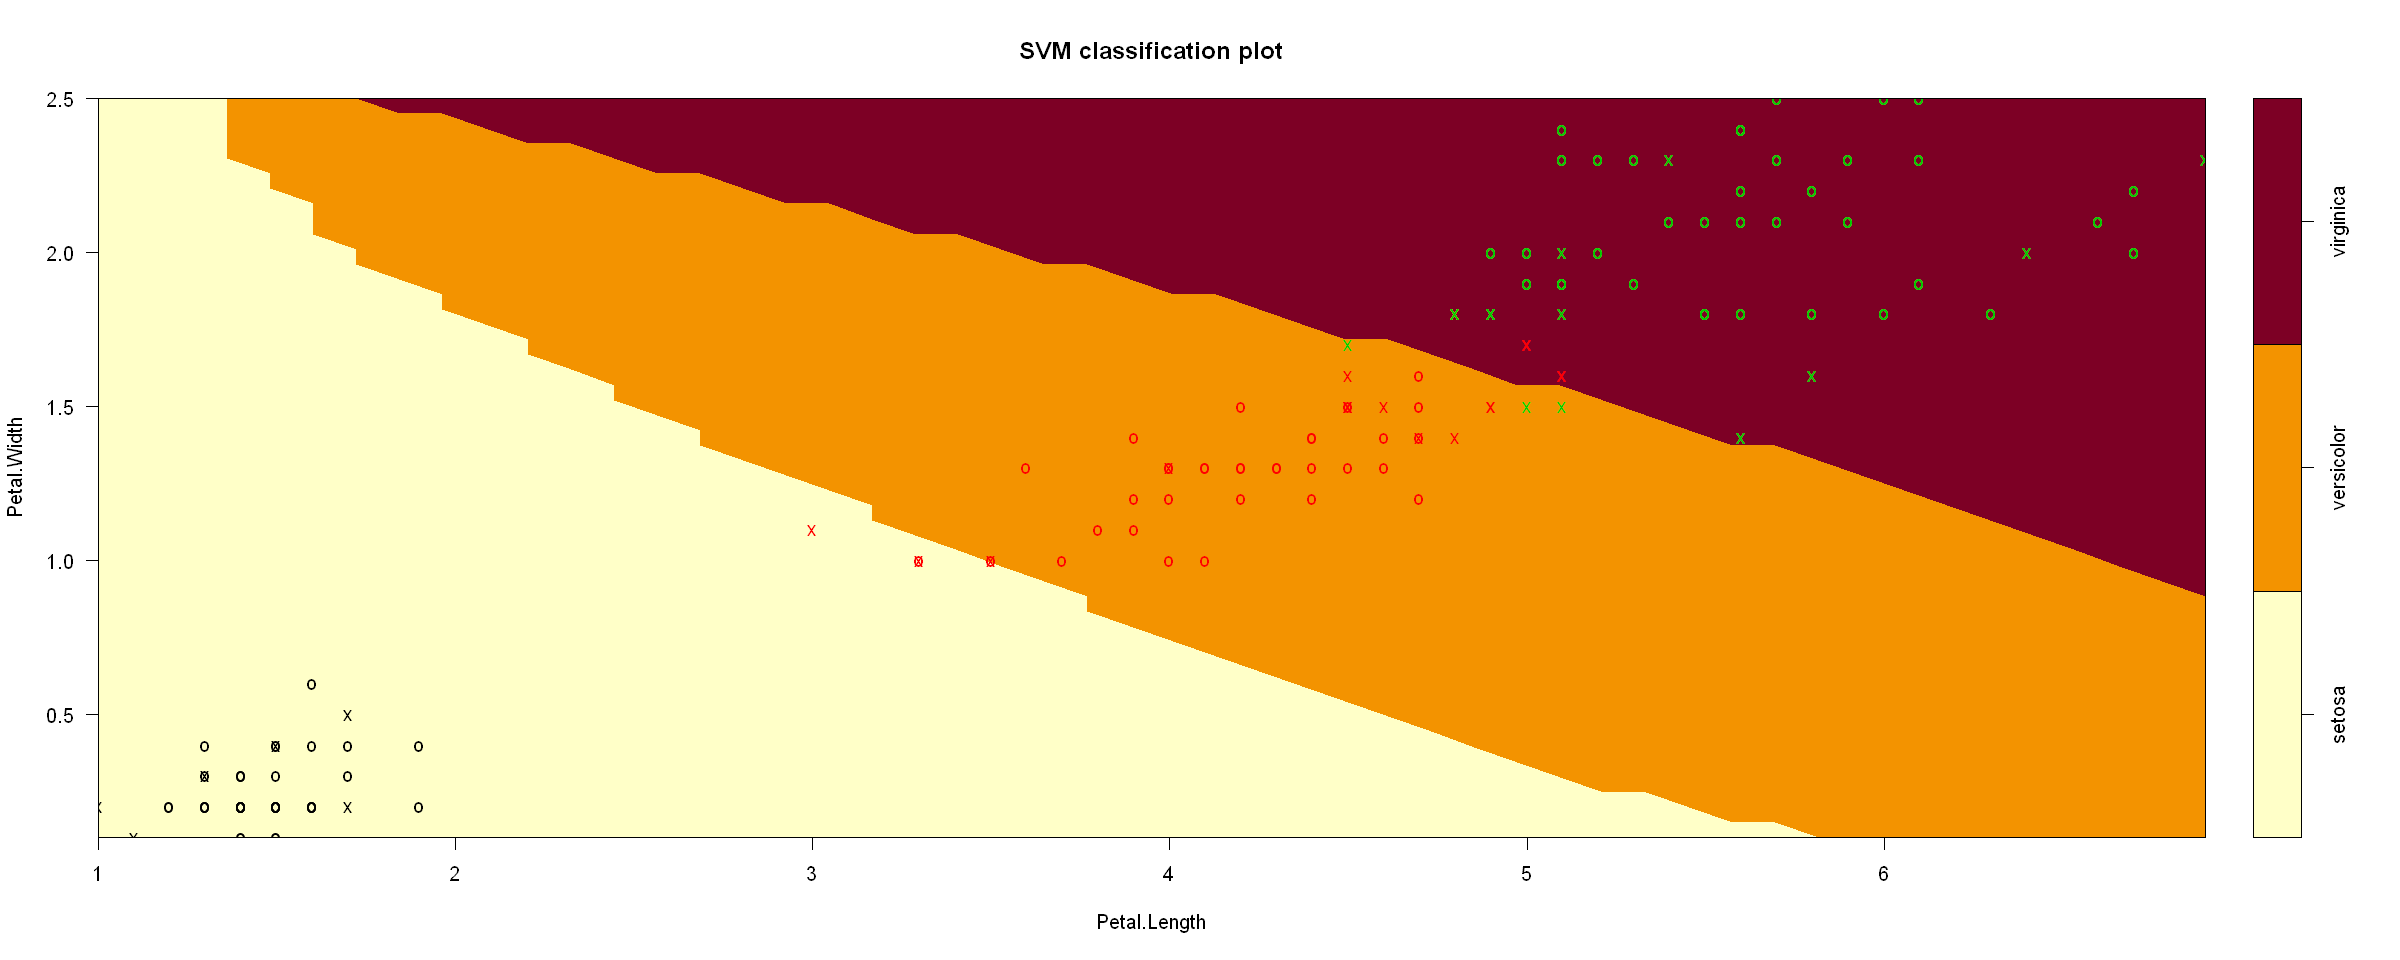

In [17]:
plot(mymodel , data = iris , Petal.Width~ Petal.Length, 
     slice = list(Sepal.Length = 4 , Sepal.Width = 3))




In [19]:
pred <- predict(mymodel , iris)
tab <- table(Predicted = pred , Actual = iris$Species)
tab
accuracy1 <- sum(diag(tab)) / sum(tab)
accuracy1

            Actual
Predicted    setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         0
  virginica       0          2        50

[1] 0.9866667